In [60]:
import pandas as pd
import numpy as np
#upload the file to github and use it
df= pd.read_csv('https://raw.githubusercontent.com/ysu7/csv/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
#check if the data has none
df.isnull().sum()
df.shape

(768, 9)

decision tree:

In [62]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt



# Separate features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Define a grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,3, 5, 10, 15,20],
    'min_samples_split': [2, 5, 10,15,20,25,30],
    'min_samples_leaf': [1, 2, 4,8,16,20]
}
# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_param = grid_search.best_params_

# Evaluate the best paramater
print(best_param)


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 16, 'min_samples_split': 2}


In [63]:
#

Cross-Validation Scores: [0.76422764 0.78861789 0.79674797 0.76422764 0.75409836]
Mean CV Accuracy: 0.77



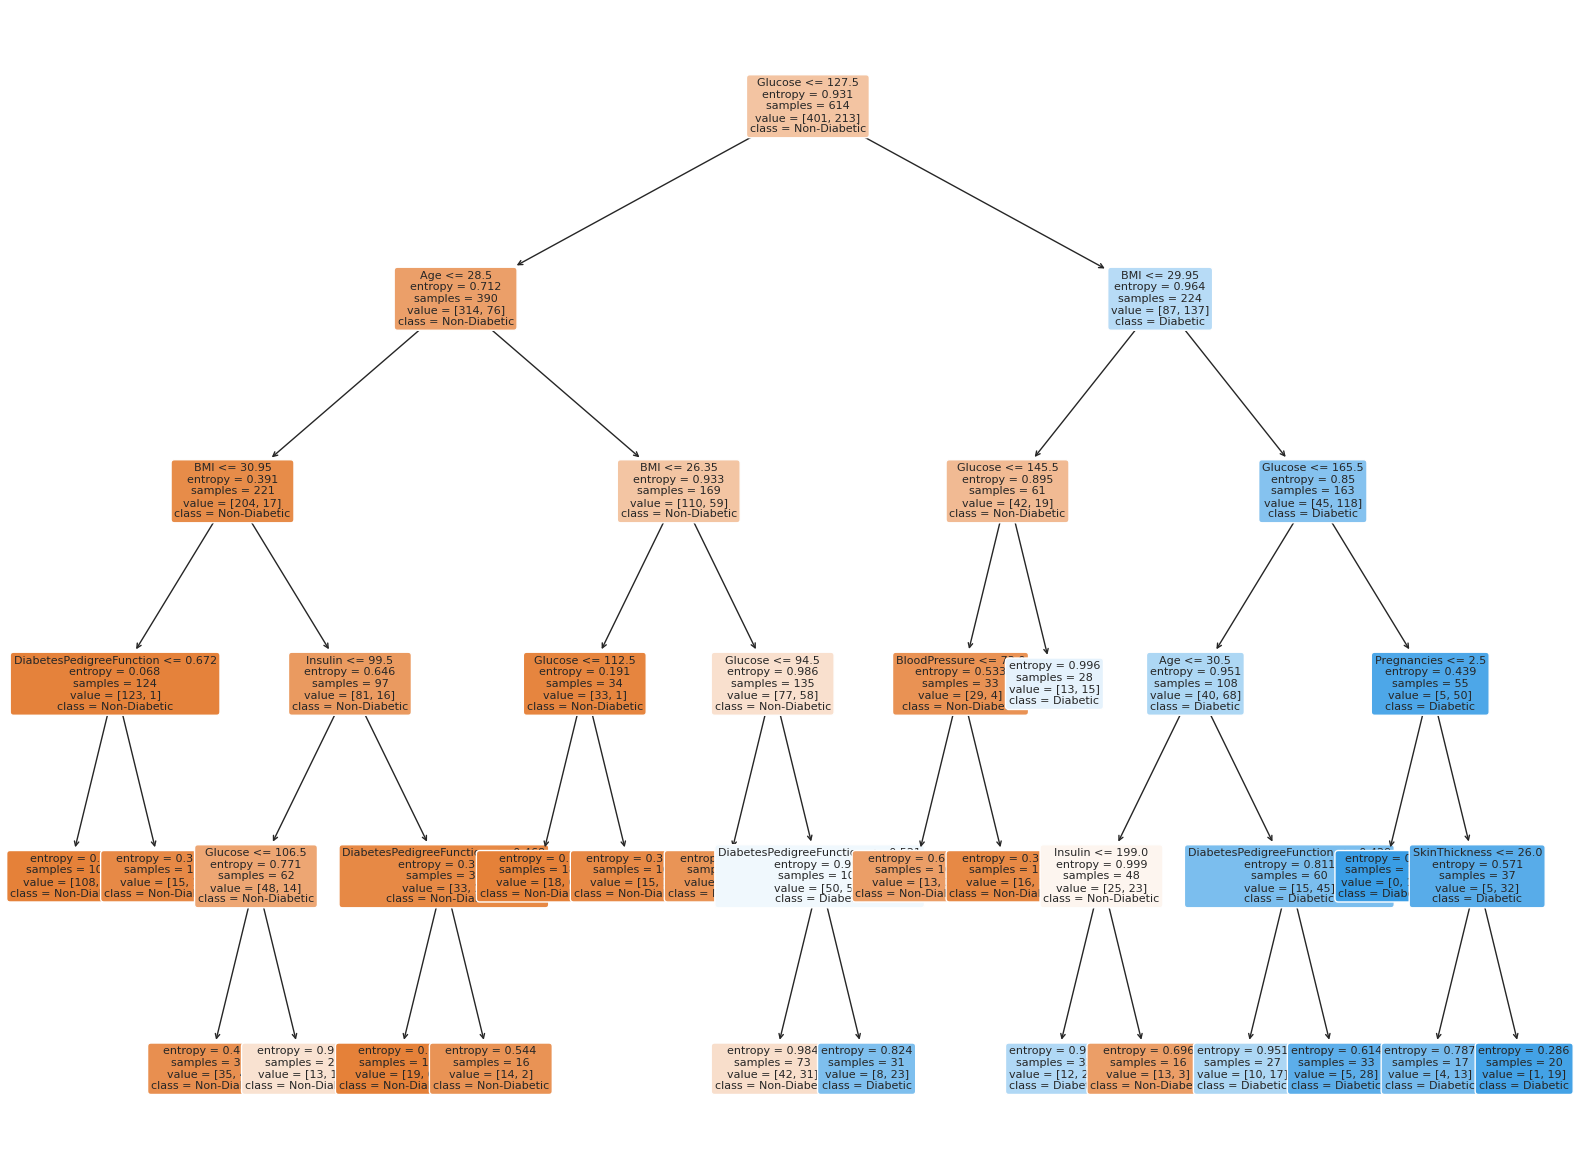

In [64]:
# Use the best parameters to instantiate the model
clf = DecisionTreeClassifier(**best_param, random_state=42)
# Evaluate the model using cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

#could save cv_scores
cv_scores_dt = np.array(cv_scores)


print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean():.2f}\n')
# Fit the model on the training data
clf.fit(X_train, y_train)

plt.figure(figsize=(20,15))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], rounded=True,fontsize=8)
plt.show()

In [65]:
#could save
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Additional metrics
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
[[80 19]
 [17 38]]


K-Nearest Neighbors (KNN):


In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X and y are your feature matrix and target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Creating the KNN model
knn_clf = KNeighborsClassifier()

# Define a parameter grid to search
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')

# Fit the model with the best parameters
grid_search.fit(X_train_scaler, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Access the cross-validation results
cv_results = grid_search.cv_results_

# Get the indices of the top 5 mean test scores
top_indices = np.argsort(cv_results['mean_test_score'])[-5:]

# Print the hyperparameter values and corresponding mean test scores for the top 5
for index in top_indices:
    params = cv_results['params'][index]
    mean_score = cv_results['mean_test_score'][index]
    print(f"Hyperparameters: {params}, Mean Cross-Validation Score: {mean_score}")

# Use the best model for prediction
best_knn_clf = grid_search.best_estimator_
knn_prediction = best_knn_clf.predict(X_test_scaler)

# Calculating accuracy of the best KNN model, same as accurate score.
knn_score = accuracy_score(y_test, knn_prediction)
print("Best KNN Score:", knn_score)

#save the 5 scores inside a array
cv_scores_knn=np.array([cv_results['mean_test_score'][index] for index in top_indices])


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}, Mean Cross-Validation Score: 0.7541250166600026
Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}, Mean Cross-Validation Score: 0.7589764094362256
Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}, Mean Cross-Validation Score: 0.7606024256963881
Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}, Mean Cross-Validation Score: 0.7638677862188459
Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}, Mean Cross-Validation Score: 0.7655337864854058
Best KNN Score: 0.6948051948051948


In [67]:
#cv_scores_knn.mean()


SVM:

5 Cross-Validation Scores:
[0.76385446 0.76385446 0.76385446 0.76546715 0.76546715]
Best Parameters:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.77
Accuracy on Test Set: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



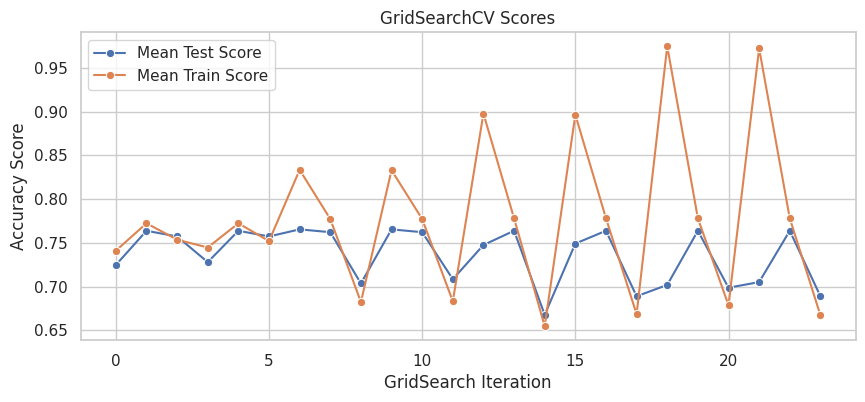

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming you have X and y defined

PARAM_GRID = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear', 'sigmoid']
}

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
CV_FOLDS = 5

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_classifier, PARAM_GRID, cv=CV_FOLDS, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Access the cross-validation results
cv_results = grid_search.cv_results_

# Get the indices of the top 5 mean test scores
top_indices = np.argsort(cv_results['mean_test_score'])[-5:]

# Print the 5 Cross-Validation Scores
cv_scores = cv_results['mean_test_score'][top_indices]
print("5 Cross-Validation Scores:")
print(cv_scores)

# Save the 5 Cross-Validation Scores in a NumPy array
cv_scores_SVM = np.array(cv_scores)

# Print the best parameters and best cross-validation score
print("Best Parameters:")
print(grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

# Train the SVM model with the best parameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_svm.predict(X_test)

# Evaluate the model performance on the test set
print("Accuracy on Test Set: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot GridSearchCV Scores
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")  # Set seaborn style for improved aesthetics

# Plot mean test scores
sns.lineplot(x=range(len(cv_results['mean_test_score'])), y=cv_results['mean_test_score'], label='Mean Test Score', marker='o')

# Plot mean train scores
sns.lineplot(x=range(len(cv_results['mean_train_score'])), y=cv_results['mean_train_score'], label='Mean Train Score', marker='o')

plt.title("GridSearchCV Scores")
plt.xlabel("GridSearch Iteration")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()


Trying to imporve decision tree:

In [69]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn import tree



MAX_DEPTH_RANGE = [5, 6, 7]
CRITERION_OPTIONS = ['gini', 'entropy']
CV_FOLDS = 10


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': MAX_DEPTH_RANGE,
    'criterion': CRITERION_OPTIONS
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=RepeatedStratifiedKFold(n_splits=CV_FOLDS, n_repeats=3, random_state=RANDOM_STATE), scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:")
print(grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

y_pred = best_dt.predict(X_test)
print("Accuracy on Test Set: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))




Best Parameters:
{'criterion': 'gini', 'max_depth': 5}
Best Cross-Validation Score: 0.75
Accuracy on Test Set: 0.79
Confusion Matrix:
[[87 12]
 [20 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



trying to improve K-Nearest Neighbors (KNN):

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Robust Scaling
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)

# Power Transformation (Yeo-Johnson)
power_transformer = PowerTransformer()
X_train_power = power_transformer.fit_transform(X_train)
X_test_power = power_transformer.transform(X_test)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_train_min_max = min_max_scaler.fit_transform(X_train)
X_test_min_max = min_max_scaler.transform(X_test)

# Dimensionality Reduction using PCA
pca = PCA(n_components=0.95)  # Adjust the explained variance ratio
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# KNN Classifier
knn_clf = KNeighborsClassifier()

# Define an expanded grid of hyperparameters to search
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Access the cross-validation results
cv_results = grid_search.cv_results_

# Get the indices of the top 5 mean test scores
top_indices = np.argsort(cv_results['mean_test_score'])[-5:]

# Print the hyperparameter values and corresponding mean test scores for the top 5
for index in top_indices:
    params = cv_results['params'][index]
    mean_score = cv_results['mean_test_score'][index]
    print(f"Hyperparameters: {params}, Mean Cross-Validation Score: {mean_score}")

# Use the best model for prediction
best_knn_clf = grid_search.best_estimator_
knn_prediction = best_knn_clf.predict(X_test_scaled)

# Calculating accuracy of the best KNN model, same as accuracy score.
knn_score = accuracy_score(y_test, knn_prediction)
print("Best KNN Score:", knn_score)




Best Parameters: {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'uniform'}, Mean Cross-Validation Score: 0.7622151139544182
Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}, Mean Cross-Validation Score: 0.7638677862188459
Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}, Mean Cross-Validation Score: 0.7655337864854058
Hyperparameters: {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'}, Mean Cross-Validation Score: 0.7655337864854058
Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}, Mean Cross-Validation Score: 0.7670798347327736
Best KNN Score: 0.7727272727272727
